In [3]:
import numpy as np
import pandas as pd
import string
import nltk
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from matplotlib import pyplot as plt


In [4]:
df=pd.read_excel('C:/Users/Manju JS/Documents/Python Scripts/Amazon.xlsx')

In [5]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [6]:
text=df[['reviews.text']]

In [7]:
#vadar algo -valense Aware Dictionary sEntiment Reasoner
!pip install vaderSentiment

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
#sentiment token
sid=SentimentIntensityAnalyzer()

In [10]:
sid.polarity_scores("India is not doing good interms of GDP.But I still like to live in India")

{'compound': 0.0243, 'neg': 0.142, 'neu': 0.71, 'pos': 0.148}

In [11]:
text['Clean_text']=text['reviews.text'].str.lower().str.replace('[^a-z ]','')
stop=stopwords.words('english')

C:\Users\Manju JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
def sw(text):
    text=[word for word in text.split() if word not in stop]
    return " ".join(text)
text['Split_words']=text['Clean_text'].apply(sw)

C:\Users\Manju JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
#function to polarity_scores to all the rows of my clean text
text_polarity=lambda text: sid.polarity_scores(text)['compound']

In [14]:
text['Split_words'].apply(text_polarity).head()

0    0.9566
1    0.9827
2    0.3818
3    0.9545
4    0.9895
Name: Split_words, dtype: float64

In [15]:
text['Split_words'].apply(text_polarity).min()

-0.9638

In [16]:
#Applying the text polarity function 
text['polarity']=text['Split_words'].apply(text_polarity)
text.head()

C:\Users\Manju JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reviews.text,Clean_text,Split_words,polarity
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...,0.9566
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,allow preface little history casual reader own...,0.9827
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,enjoying far great reading original fire since...,0.3818
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,bought one first paperwhites pleased constant ...,0.9545
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,say upfront dont like coroporate hermetically ...,0.9895


In [17]:
print(text['reviews.text'][2])

I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.


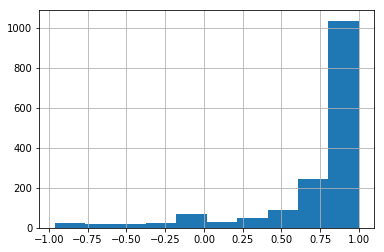

In [18]:
#checing the distribution of polarity
text['polarity'].hist()

In [19]:
#category of polarity
import numpy as np
sentiment_mapping={1:'Very Bad',2:'Bad',3:'Satisfactory',4:'Good',5:'Excl'}


In [20]:
map_polarity=lambda x:np.digitize(x,[-1,-.5,.25,.5,.75,1])
#create an additional column
text['sentiment_category']=text['polarity'].apply(map_polarity)
text.head()

C:\Users\Manju JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reviews.text,Clean_text,Split_words,polarity,sentiment_category
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...,0.9566,5
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,allow preface little history casual reader own...,0.9827,5
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading had ...,enjoying far great reading original fire since...,0.3818,3
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,bought one first paperwhites pleased constant ...,0.9545,5
4,I have to say upfront - I don't like coroporat...,i have to say upfront i dont like coroporate ...,say upfront dont like coroporate hermetically ...,0.9895,5


In [21]:
#labeling the category
text['label']=text['sentiment_category'].replace(sentiment_mapping)

C:\Users\Manju JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:

text[['label','sentiment_category']].groupby(['sentiment_category']).count()

,label
sentiment_category,
1,44
2,145
3,82
4,186
5,1140


In [24]:
#splitting dta into text and train
X=text['Split_words']
y=text['sentiment_category']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
len(X_train)

1277

In [27]:
len(X_test)

320

In [28]:
#creating the tfidf matrix of X_train
vect=TfidfVectorizer()
X_train_vect=vect.fit_transform(X_train)
X_train_vect

<1277x6691 sparse matrix of type '<class 'numpy.float64'>'
	with 80005 stored elements in Compressed Sparse Row format>

In [29]:
#NB model
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()

In [30]:
#feed the training data to the model
nb_model.fit(X_train_vect,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
#testing the model
X_test_vect=vect.fit_transform(X_test)
X_test_vect

<320x3783 sparse matrix of type '<class 'numpy.float64'>'
	with 20765 stored elements in Compressed Sparse Row format>